In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Fengyuan = df['SiteName'].isin(['豐原']) #找豐原測站
df[Fengyuan]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
14059,15050,豐原,臺中市,67.0,細懸浮微粒,普通,0.9,0.21,0.3,20,...,24.0,8.0,6.5,6.7,0.3,2.1,106.0,2017/1/8 02:00,36.0,22.0
14135,15126,豐原,臺中市,61.0,細懸浮微粒,普通,1.0,0.2,0.3,20,...,24.0,11.0,5.7,6.3,0.5,1.7,110.0,2017/1/8 03:00,33.0,19.0
14211,15202,豐原,臺中市,56.0,細懸浮微粒,普通,1.1,0.2,0.3,21,...,25.0,11.0,6.5,7.9,1.5,2.1,107.0,2017/1/8 04:00,33.0,18.0
14287,15278,豐原,臺中市,53.0,細懸浮微粒,普通,1.2,0.2,0.2,21,...,23.0,11.0,6.3,7.6,1.3,1.6,96.0,2017/1/8 05:00,31.0,16.0
14363,15354,豐原,臺中市,44.0,NaN,良好,1.2,0.27,0.2,14,...,24.0,7.0,10.0,12.0,1.5,0.8,75.0,2017/1/8 06:00,28.0,14.0
14439,15430,豐原,臺中市,35.0,NaN,良好,1.1,0.37,0.2,9.7,...,23.0,9.0,15.0,17.0,2.4,1.2,81.0,2017/1/8 07:00,25.0,11.0
14515,15506,豐原,臺中市,32.0,NaN,良好,1.5,0.52,0.3,10,...,27.0,7.0,18.0,26.0,7.9,1.5,59.0,2017/1/8 08:00,24.0,10.0
14591,15582,豐原,臺中市,30.0,NaN,良好,1.7,0.47,0.3,15,...,29.0,7.0,19.0,27.0,7.9,1.3,55.0,2017/1/8 09:00,25.0,9.0
14667,15658,豐原,臺中市,29.0,NaN,良好,2.9,0.31,0.3,26,...,39.0,5.0,13.0,19.0,6.4,2.7,316.0,2017/1/8 10:00,28.0,9.0
14743,15734,豐原,臺中市,30.0,NaN,良好,5.3,0.33,0.3,20,...,52.0,12.0,19.0,31.0,12.0,3.0,317.0,2017/1/8 11:00,32.0,9.0


In [4]:
Fengyuan = df['SiteName'].isin(['豐原']) #找豐原測站
Fengyuan=df[Fengyuan].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column

Fengyuan

,SO2,CO,O3,PM10,PM25,NO2
0,0.9,0.21,20,24.0,8.0,6.5
1,1.0,0.2,20,24.0,11.0,5.7
2,1.1,0.2,21,25.0,11.0,6.5
3,1.2,0.2,21,23.0,11.0,6.3
4,1.2,0.27,14,24.0,7.0,10.0
5,1.1,0.37,9.7,23.0,9.0,15.0
6,1.5,0.52,10,27.0,7.0,18.0
7,1.7,0.47,15,29.0,7.0,19.0
8,2.9,0.31,26,39.0,5.0,13.0
9,5.3,0.33,20,52.0,12.0,19.0


In [5]:
bbb=Fengyuan['PM10']>50
#Fengyuan['PM10']=Fengyuan['PM10'].astype("int")
#Fengyuan['PM10']=Fengyuan['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Fengyuan['PM10'].replace(2,np.nan, inplace=True)


In [6]:
Fengyuan.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
 
Fengyuan

,SO2,CO,O3,PM10,PM25,NO2
0,0.9,0.21,20.0,24.0,8.0,6.5
1,1.0,0.20,20.0,24.0,11.0,5.7
2,1.1,0.20,21.0,25.0,11.0,6.5
3,1.2,0.20,21.0,23.0,11.0,6.3
4,1.2,0.27,14.0,24.0,7.0,10.0
5,1.1,0.37,9.7,23.0,9.0,15.0
6,1.5,0.52,10.0,27.0,7.0,18.0
7,1.7,0.47,15.0,29.0,7.0,19.0
8,2.9,0.31,26.0,39.0,5.0,13.0
9,5.3,0.33,20.0,52.0,12.0,19.0


In [7]:
aaa=Fengyuan['PM10']>200
Fengyuan[aaa]

,SO2,CO,O3,PM10,PM25,NO2
7770,4.4,0.92,16.0,209.0,95.0,25.0


In [8]:
Fengyuan.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Fengyuan

,SO2,CO,O3,PM10,PM25,NO2
0,0.9,0.21,20.0,24.0,8.0,6.5
1,1.0,0.20,20.0,24.0,11.0,5.7
2,1.1,0.20,21.0,25.0,11.0,6.5
3,1.2,0.20,21.0,23.0,11.0,6.3
4,1.2,0.27,14.0,24.0,7.0,10.0
5,1.1,0.37,9.7,23.0,9.0,15.0
6,1.5,0.52,10.0,27.0,7.0,18.0
7,1.7,0.47,15.0,29.0,7.0,19.0
8,2.9,0.31,26.0,39.0,5.0,13.0
9,5.3,0.33,20.0,52.0,12.0,19.0


In [9]:
Fengyuan['pr']=''
#Fengyuan.drop([ 0,1],inplace=True)
#Fengyuan.reset_index(drop=True,inplace=True)
#000

Fengyuan.to_csv('Fengyuanpollution.csv')

Fengyuan

,SO2,CO,O3,PM10,PM25,NO2,pr
0,0.9,0.21,20.0,24.0,8.0,6.5,
1,1.0,0.20,20.0,24.0,11.0,5.7,
2,1.1,0.20,21.0,25.0,11.0,6.5,
3,1.2,0.20,21.0,23.0,11.0,6.3,
4,1.2,0.27,14.0,24.0,7.0,10.0,
5,1.1,0.37,9.7,23.0,9.0,15.0,
6,1.5,0.52,10.0,27.0,7.0,18.0,
7,1.7,0.47,15.0,29.0,7.0,19.0,
8,2.9,0.31,26.0,39.0,5.0,13.0,
9,5.3,0.33,20.0,52.0,12.0,19.0,


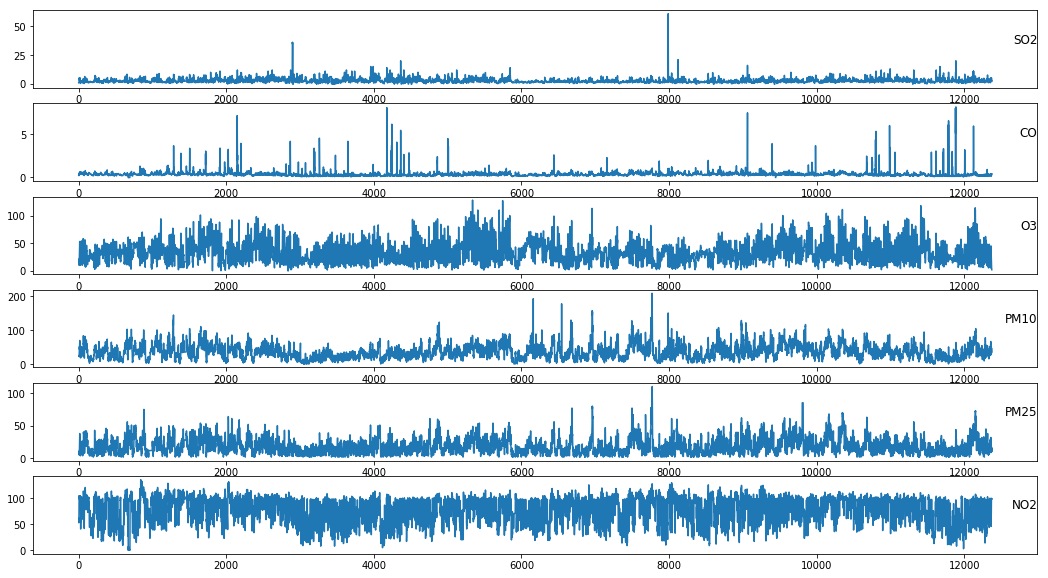

In [10]:
# load dataset
dataset =pd.read_csv('Fengyuanpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.868962,-0.379811,-0.657068,-0.578996,-0.910710,-0.634376,8.0
1,-0.817135,-0.406372,-0.657068,-0.578996,-0.658486,-0.945518,11.0
2,-0.765308,-0.406372,-0.603812,-0.530477,-0.658486,-0.634376,11.0
3,-0.713481,-0.406372,-0.603812,-0.627514,-0.658486,-0.712161,11.0
4,-0.713481,-0.220443,-0.976603,-0.578996,-0.994785,0.726873,7.0
5,-0.765308,0.045170,-1.205603,-0.627514,-0.826635,0.921337,9.0
6,-0.557999,0.443590,-1.189626,-0.433439,-0.994785,1.038015,7.0
7,-0.454345,0.310784,-0.923347,-0.336401,-0.994785,1.076908,7.0
8,0.167581,-0.114198,-0.337533,0.148787,-1.162934,0.843551,5.0
9,1.411432,-0.061075,-0.657068,0.779532,-0.574411,1.076908,12.0


In [12]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [13]:
'''#將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
'''

'#將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X,Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]\n'

In [14]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(24, 6))`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
__________

9999/9999 [==============================] - 1s 74us/step - loss: 58.3177 - val_loss: 55.4518
Epoch 65/500
9999/9999 [==============================] - 1s 74us/step - loss: 58.3308 - val_loss: 54.2483
Epoch 66/500
9999/9999 [==============================] - 1s 75us/step - loss: 58.0678 - val_loss: 57.3792
Epoch 67/500
9999/9999 [==============================] - 1s 78us/step - loss: 57.9665 - val_loss: 54.6472
Epoch 68/500
9999/9999 [==============================] - 1s 77us/step - loss: 56.4967 - val_loss: 54.4218
Epoch 69/500
9999/9999 [==============================] - 1s 78us/step - loss: 57.7834 - val_loss: 53.3849
Epoch 70/500
9999/9999 [==============================] - 1s 77us/step - loss: 57.0023 - val_loss: 53.3140
Epoch 71/500
9999/9999 [==============================] - 1s 87us/step - loss: 56.7846 - val_loss: 53.1577
Epoch 72/500
9999/9999 [==============================] - 1s 79us/step - loss: 56.5679 - val_loss: 54.1635
Epoch 73/500
9999/9999 [==========================

9999/9999 [==============================] - 1s 76us/step - loss: 45.1723 - val_loss: 41.6383
Epoch 141/500
9999/9999 [==============================] - 1s 79us/step - loss: 45.4205 - val_loss: 42.3128
Epoch 142/500
9999/9999 [==============================] - 1s 77us/step - loss: 45.4614 - val_loss: 42.8137
Epoch 143/500
9999/9999 [==============================] - 1s 74us/step - loss: 45.1135 - val_loss: 42.1675
Epoch 144/500
9999/9999 [==============================] - 1s 76us/step - loss: 45.5602 - val_loss: 42.2799
Epoch 145/500
9999/9999 [==============================] - 1s 79us/step - loss: 45.3868 - val_loss: 44.6556
Epoch 146/500
9999/9999 [==============================] - 1s 80us/step - loss: 44.7903 - val_loss: 42.4576
Epoch 147/500
9999/9999 [==============================] - 1s 80us/step - loss: 45.3487 - val_loss: 42.8969
Epoch 148/500
9999/9999 [==============================] - 1s 75us/step - loss: 45.6193 - val_loss: 42.0934
Epoch 149/500
9999/9999 [=================

9999/9999 [==============================] - 1s 74us/step - loss: 40.5776 - val_loss: 38.1806
Epoch 216/500
9999/9999 [==============================] - 1s 74us/step - loss: 40.4864 - val_loss: 37.0867
Epoch 217/500
9999/9999 [==============================] - 1s 80us/step - loss: 40.9101 - val_loss: 37.1655
Epoch 218/500
9999/9999 [==============================] - 1s 78us/step - loss: 40.3565 - val_loss: 37.7234
Epoch 219/500
9999/9999 [==============================] - 1s 79us/step - loss: 39.8427 - val_loss: 37.9361
Epoch 220/500
9999/9999 [==============================] - 1s 74us/step - loss: 40.6817 - val_loss: 36.8622
Epoch 221/500
9999/9999 [==============================] - 1s 83us/step - loss: 39.8506 - val_loss: 37.0938
Epoch 222/500
9999/9999 [==============================] - 1s 80us/step - loss: 40.2121 - val_loss: 36.4534
Epoch 223/500
9999/9999 [==============================] - 1s 76us/step - loss: 40.4895 - val_loss: 37.6817
Epoch 224/500
9999/9999 [=================

Epoch 291/500
9999/9999 [==============================] - 1s 78us/step - loss: 37.1610 - val_loss: 34.3845
Epoch 292/500
9999/9999 [==============================] - 1s 77us/step - loss: 37.2174 - val_loss: 33.9480
Epoch 293/500
9999/9999 [==============================] - 1s 76us/step - loss: 37.3599 - val_loss: 34.4000
Epoch 294/500
9999/9999 [==============================] - 1s 79us/step - loss: 37.2829 - val_loss: 34.0709
Epoch 295/500
9999/9999 [==============================] - 1s 75us/step - loss: 37.2849 - val_loss: 34.8479
Epoch 296/500
9999/9999 [==============================] - 1s 74us/step - loss: 37.1184 - val_loss: 34.0184
Epoch 297/500
9999/9999 [==============================] - 1s 80us/step - loss: 37.1974 - val_loss: 33.5823
Epoch 298/500
9999/9999 [==============================] - 1s 75us/step - loss: 37.5244 - val_loss: 32.9685
Epoch 299/500
9999/9999 [==============================] - 1s 79us/step - loss: 37.1421 - val_loss: 33.3982
Epoch 300/500
9999/9999 [===

Epoch 367/500
9999/9999 [==============================] - 1s 84us/step - loss: 34.6895 - val_loss: 31.5683
Epoch 368/500
9999/9999 [==============================] - 1s 76us/step - loss: 34.3678 - val_loss: 31.2646
Epoch 369/500
9999/9999 [==============================] - 1s 73us/step - loss: 35.0649 - val_loss: 30.8822
Epoch 370/500
9999/9999 [==============================] - 1s 76us/step - loss: 34.5039 - val_loss: 31.8017
Epoch 371/500
9999/9999 [==============================] - 1s 82us/step - loss: 34.9163 - val_loss: 31.2511
Epoch 372/500
9999/9999 [==============================] - 1s 77us/step - loss: 35.1450 - val_loss: 31.6107
Epoch 373/500
9999/9999 [==============================] - 1s 75us/step - loss: 34.7814 - val_loss: 31.3267
Epoch 374/500
9999/9999 [==============================] - 1s 75us/step - loss: 34.7004 - val_loss: 31.9406
Epoch 375/500
9999/9999 [==============================] - 1s 76us/step - loss: 34.4829 - val_loss: 31.3887
Epoch 376/500
9999/9999 [===

Epoch 443/500
9999/9999 [==============================] - 1s 74us/step - loss: 32.3579 - val_loss: 28.9713
Epoch 444/500
9999/9999 [==============================] - 1s 81us/step - loss: 32.8502 - val_loss: 29.8251
Epoch 445/500
9999/9999 [==============================] - 1s 76us/step - loss: 32.4832 - val_loss: 28.9993
Epoch 446/500
9999/9999 [==============================] - 1s 75us/step - loss: 32.8994 - val_loss: 29.5835
Epoch 447/500
9999/9999 [==============================] - 1s 84us/step - loss: 33.0976 - val_loss: 29.5074
Epoch 448/500
9999/9999 [==============================] - 1s 75us/step - loss: 32.9263 - val_loss: 28.9415
Epoch 449/500
9999/9999 [==============================] - 1s 74us/step - loss: 32.5260 - val_loss: 29.1376
Epoch 450/500
9999/9999 [==============================] - 1s 75us/step - loss: 32.9731 - val_loss: 28.9534
Epoch 451/500
9999/9999 [==============================] - 1s 74us/step - loss: 32.4319 - val_loss: 29.5961
Epoch 452/500
9999/9999 [===

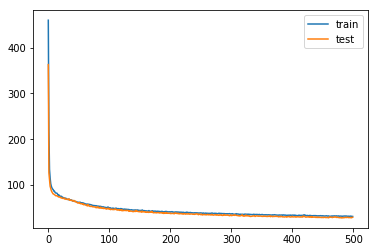

In [17]:
#model1
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,24,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Fengyuanmodel.h5')
del model

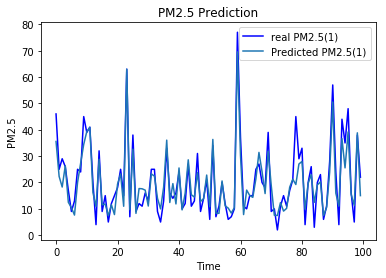

Train 0.31233123312331235
Validation 0.3087520259319287
1.2512545128479514e+35
The R2 score on the Test set is:	0.797
Train Score: 4.81 RMSE
Test Score: 5.29 RMSE
The MSE   on the Test set is: 27.99067117845164
The RMSE  on the Test set is: 5.290621057914811
The MAE   on the Test set is: 4.070406467171006
The MAPE  on the Test set is: 0.028168167494044414
The SMAPE on the Test set is: 0.021941728444460688


In [18]:
#讀取model3
model = load_model('Fengyuanmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

